<a href="https://colab.research.google.com/github/Styleflo/CocoBot/blob/main/ProjetFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Final Apprentissage automatique pour données massives

Equipe : Yann, Alix, Florian, Thomas

# Partie 0 : Import des données

In [1]:
from datasets import load_dataset
import pandas as pd
import os
import requests
from matplotlib.pyplot import title
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from StreamlitApp import emb_img

dataset = load_dataset("DBQ/Chanel.Product.prices.Germany")


/Users/Florian/Documents/test/venv/ProjetFinal/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['website_name', 'competence_date', 'country_code', 'currency_code', 'brand', 'category1_code', 'category2_code', 'category3_code', 'product_code', 'title', 'itemurl', 'imageurl', 'full_price', 'price', 'full_price_eur', 'price_eur', 'flg_discount'],
        num_rows: 1428
    })
})

In [3]:
df = dataset["train"].to_pandas()


# Partie 1 : Analyse approfondie du jeu de données

## Observations générales

In [4]:
df.head()

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,5200.0,5200.0,5200.0,0
1,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y099539...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0,5750.0,5750.0,5750.0,0
2,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,BLUE LIGHT GLASSES,N.A.,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,420.0,420.0,420.0,0
3,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,580.0,580.0,580.0,0
4,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,480.0,480.0,480.0,0


Ceci nous donne une première idée du Dataset.

In [5]:
df.info()
print("\nTaux de valeurs manquantes par colonne (%):")
print((df.isna().mean() * 100).round(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     1428 non-null   object 
 1   competence_date  1428 non-null   object 
 2   country_code     1428 non-null   object 
 3   currency_code    1428 non-null   object 
 4   brand            1428 non-null   object 
 5   category1_code   1428 non-null   object 
 6   category2_code   1428 non-null   object 
 7   category3_code   1428 non-null   object 
 8   product_code     1428 non-null   object 
 9   title            1428 non-null   object 
 10  itemurl          1428 non-null   object 
 11  imageurl         1428 non-null   object 
 12  full_price       1428 non-null   float64
 13  price            1428 non-null   float64
 14  full_price_eur   1428 non-null   float64
 15  price_eur        1428 non-null   float64
 16  flg_discount     1428 non-null   int64  
dtypes: float64(4),

Ceci nous donne le type de chaque colonne, combien de valeurs non nulles, et le pourcentage de NaN par colonne.

Selon df.info() et le taux de valeurs manquantes, aucune colonne ne contient de valeurs manquantes au sens strict (NaN). Cependant, certaines colonnes (par exemple category3_code) utilisent la chaîne de caractères "N.A." pour représenter une absence d’information, ce qui peut être assimilé à une valeur manquante d’un point de vue sémantique.

In [6]:
df.describe(include='all')

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
count,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428.000000,1428.000000,1428.000000,1428.000000,1428.0
unique,1,1,1,1,1,7,51,1,1428,824,1428,1383,NaN,NaN,NaN,NaN,NaN
top,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,READY-TO-WEAR,N.A.,PAS4152B13455,18 Karat Weißgold Diamanten,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,NaN,NaN,NaN,NaN,NaN
freq,1428,1428,1428,1428,1428,550,243,1428,1,68,1,46,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6076.253725,6076.253725,6076.253725,6076.253725,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219.005999,15219.005999,15219.005999,15219.005999,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,23.000000,23.000000,23.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.000000,195.000000,195.000000,195.000000,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415.000000,1415.000000,1415.000000,1415.000000,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5800.000000,5800.000000,5800.000000,5800.000000,0.0


Ici, on remarque plusieurs choses intéréssantes :

1. Les colonnes website_name, competence_date, country_code, currency_code, brand, category3_code ne sont pas très utiles : elles ont la même valeur sur toutes les lignes sans exceptions. Ces colonnes sont surtout métadonnées → utiles à décrire le jeu de données, mais pas informatives pour l’apprentissage (aucune variance). On pourra les exclure des features pour les modèles d’embeddings / reco.
2. Tous les product_code, itemurl sont bien différents.
3. Il y a des titres en communs, dont "18 Karat Weißgold Diamanten" qui revient jusqu'à 68 fois.
4. Il y a également des imageurl qui reviennent plusieurs fois (jusqu'à 46 fois)
5. Il semble que full_price, price, full_price_eur, price_eur soient 4 fois la même colonne.
6. Il semble aussi que flg_discount ne soient que des 0.

In [7]:
diff = (
    (df["price"] != df["full_price"]) |
    (df["price_eur"] != df["price"]) |
    (df["full_price_eur"] != df["price_eur"])
)
diff.sum()

np.int64(0)

On peut conffirmer que les 4 colonnes sont strictement identiques. Nous allons donc précéder à la suppression de toutes les colonnes inutiles :

In [8]:
# Drop specified columns in-place
df.drop(columns=['website_name', 'competence_date', 'country_code', 'currency_code', 'brand', 'category3_code', 'full_price', 'full_price_eur', 'price_eur', 'flg_discount'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category1_code  1428 non-null   object 
 1   category2_code  1428 non-null   object 
 2   product_code    1428 non-null   object 
 3   title           1428 non-null   object 
 4   itemurl         1428 non-null   object 
 5   imageurl        1428 non-null   object 
 6   price           1428 non-null   float64
dtypes: float64(1), object(6)
memory usage: 78.2+ KB


## Category1_code

Commençons par regarder la colonne category1_code :

In [10]:
cat1_counts = (
    df["category1_code"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "category1_code", "category1_code": "count"})
)
print("Table: category1_code value counts")
display(cat1_counts)

Table: category1_code value counts


,count,count
0,FASHION,550
1,FRAGRANCE,199
2,JEWELRY,193
3,EYEWEAR,163
4,MAKEUP,121
5,SKINCARE,104
6,WATCHES,98


Voici un tableau de toutes les différentes valeurs de category1_code et leur nombre d'apparitions. Le but ici est de vérifier qu'il n'y a pas de "N.A." par exemple.

## Category2_code

On passe maintenant à l'observation de la colonne category2_code :

In [11]:
cat2_counts = (
    df["category2_code"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "category2_code", "category2_code": "count"})
)

cat2_counts["percentage"] = (
    df["category2_code"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index(drop=True)
)

print("Table: category2_code value counts")
display(cat2_counts)

Table: category2_code value counts


,count,count,percentage
0,READY-TO-WEAR,243,17.02
1,COSTUME JEWELRY,127,8.89
2,SUNGLASSES,99,6.93
3,WOMEN,88,6.16
4,WATCHES,87,6.09
5,MEN,72,5.04
6,HANDBAGS,61,4.27
7,COCO CRUSH,54,3.78
8,SHOES,42,2.94
9,FACE,41,2.87


Pareil ici : un tableau de toutes les différentes valeurs de category2_code et leur nombre d'apparitions et on vérifie qu'il n'y a pas de "N.A.".

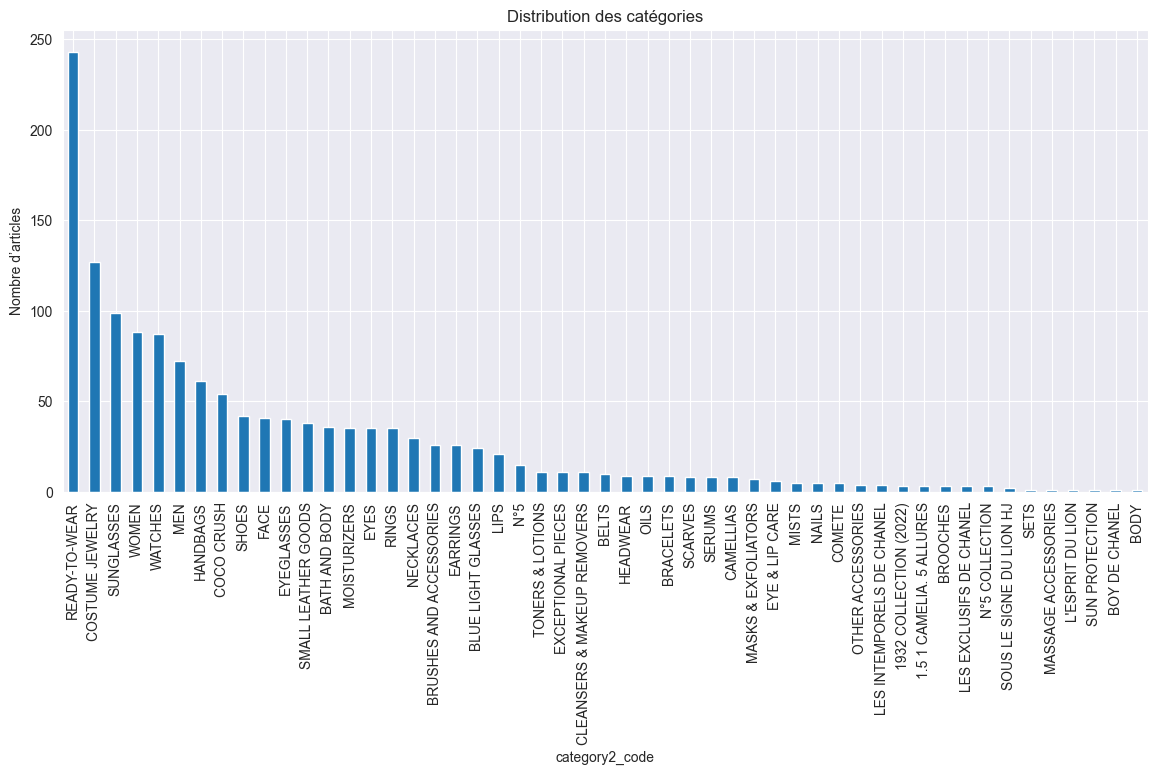

In [12]:
plt.figure(figsize=(14,6))
df['category2_code'].value_counts().plot.bar()
plt.title("Distribution des catégories")
plt.xlabel("category2_code")
plt.ylabel("Nombre d’articles")
plt.show()


### Analyse de la distribution des catégories

On observe que la répartition des catégories est fortement déséquilibrée.  
Les catégories **READY-TO-WEAR**, **COSTUME JEWELRY**, **SUNGLASSES**, **WATCHES** et **WOMEN** représentent à elles seules **plus de 50 % de l’ensemble du catalogue**.

Cela indique que le dataset est dominé par quelques familles de produits, tandis qu’une grande quantité de catégories disposent seulement de quelques exemples.  

Ce déséquilibre pourrait entraîner des biais lors de l’entraînement des modèles de classification ou de recommandation.


## Imageurl

On se concentre maintenant sur imageurl

In [13]:
img_counts = (
    df.groupby("imageurl")
      .size()
      .reset_index(name="count")
)
img_counts_duplicated = img_counts[img_counts["count"] > 1]\
                          .sort_values("count", ascending=False)

print("Table: imageurl duplicated (count > 1)")
display(img_counts_duplicated)

Table: imageurl duplicated (count > 1)


,imageurl,count
1382,https://res.cloudinary.com/dwayrkp5z/image/fet...,46


On commence de la même manière : on va regarder toutes les valeurs de imageurl qui sont différentes MAIS qui apparaissent + d'1 fois cette fois ci. Le raisonnement est le suivant : pendant que je m'occupe de cette partie, l'un d'entre nous est entrain de faire un script pour télécharger les images depuis les liens. Les liens qui ne sont donc pas fonctionels (type "N.A.") seront donc de toute façon repérés à cette étape. Ici, nous regardons si certains liens apparaissent plusieurs fois. Et la réponse est oui. On s'en était douté plus tôt lors de la description des colonnes. Il esxiste un lien, qui apparait 46 fois.

In [14]:
# On prend l'URL la plus fréquente (celle avec le count max)
top_imageurl = (
    img_counts_duplicated
    .sort_values("count", ascending=False)
    ["imageurl"]
    .iloc[0]
)

print(top_imageurl)

https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a.


In [15]:
# Filtrer les lignes ayant exactement cette imageurl
mask = df["imageurl"] == top_imageurl
rows_same_image = df.loc[mask, ["product_code", "title", "imageurl"]]

# Afficher toutes les lignes correspondantes
display(rows_same_image)

# Récupérer uniquement les product_code (éventuellement uniques)
product_codes = rows_same_image["product_code"].unique()

print("Product codes utilisant cette imageurl :")
print(product_codes)
print("Nombre de product_code distincts :", len(product_codes))

# Juste le tout premier ID :
first_product_code = product_codes[0]
print("Premier product_code :", first_product_code)


,product_code,title,imageurl
1,PA67085Y09953,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
58,PAA9624B14802,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
83,PG31318B14610,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
92,PAS3261B14471,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
102,PG02819Y01552,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
104,PG45335B14498,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
112,PAA9624B14805,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
189,PAA9624B14804,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
337,PG02819B14615,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
339,PG31318Y50006,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...


Product codes utilisant cette imageurl :
['PA67085Y09953' 'PAA9624B14802' 'PG31318B14610' 'PAS3261B14471'
 'PG02819Y01552' 'PG45335B14498' 'PAA9624B14805' 'PAA9624B14804'
 'PG02819B14615' 'PG31318Y50006' 'PG31319B14615' 'PG45220B14232'
 'PAA9476B14214' 'PAA9624B14806' 'PG29762X01000' 'PAS4051B14480'
 'PAS1161B14552' 'PG31319Y50006' 'PAP0213Y01864' 'PP75181V66865'
 'PA01112Y01295' 'PA37586Y04634' 'PG02819B14610' 'PA35200Y04059'
 'PAS4388B14299' 'PAS4051B14446' 'PAS4388B14301' 'PA69900B13280'
 'PP75338K10824' 'PA01112B12979' 'PG45220B14084' 'PG45289B14502'
 'PAS1160B07327' 'PP75267V66800' 'PAS3980B14407' 'PA69900Y04059'
 'PA01113Y01864' 'PAA9476B14213' 'PAS3261B13369' 'PAS3261B14797'
 'PAP0250Y01480' 'PAP3267B14552' 'PAS4051B14445' 'PG31319B14620'
 'PP75251V66955' 'PP75166V66807']
Nombre de product_code distincts : 46
Premier product_code : PA67085Y09953


Nous savons donc maintenant que le lien https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a. apparait 46 fois, avec tous ces produits : ['PA67085Y09953' 'PAA9624B14802' 'PG31318B14610' 'PAS3261B14471' 'PG02819Y01552' 'PG45335B14498' 'PAA9624B14805' 'PAA9624B14804' 'PG02819B14615' 'PG31318Y50006' 'PG31319B14615' 'PG45220B14232' 'PAA9476B14214' 'PAA9624B14806' 'PG29762X01000' 'PAS4051B14480' 'PAS1161B14552' 'PG31319Y50006' 'PAP0213Y01864' 'PP75181V66865' 'PA01112Y01295' 'PA37586Y04634' 'PG02819B14610' 'PA35200Y04059' 'PAS4388B14299' 'PAS4051B14446' 'PAS4388B14301' 'PA69900B13280' 'PP75338K10824' 'PA01112B12979' 'PG45220B14084' 'PG45289B14502' 'PAS1160B07327' 'PP75267V66800' 'PAS3980B14407' 'PA69900Y04059' 'PA01113Y01864' 'PAA9476B14213' 'PAS3261B13369' 'PAS3261B14797' 'PAP0250Y01480' 'PAP3267B14552' 'PAS4051B14445' 'PG31319B14620' 'PP75251V66955' 'PP75166V66807'].

Cependant, nous nous rendrons compte plus tard (lors du script pour télécharger toutes les images) que des 1383 liens distincts d'image, seulement 900 nous redirigent effectivement sur des images exploitables, et par chance, le lien qui apparait 46 fois n'en fait pas partie, nous n'aurons donc pas à gérer d'avantage ce cas.

### Import des images

Nous allons donc télécharger les images à l'aide d'un script. Les images seront stockées dans un dossier Images et on travaillera avec un un dataframe contenant les noms des images. Leurs noms est leur product_id. Enfin on créer un fichier csv pour eviter de re-télécharger les images.

In [16]:
if os.path.exists('data_images.csv') and os.path.exists('Images') and os.path.isdir('Images'):
    df_images = pd.read_csv('data_images.csv')

else:

    url_column = "imageurl"

    # 2. Créer un dossier pour stocker les images
    output_dir = "Images"
    os.makedirs(output_dir, exist_ok=True)

    valid_rows = []  # stocke les lignes valides
    image_paths = [] # stocke les chemins d'images valides

    # 3. Télécharger chaque image
    for idx, url in tqdm(df[url_column].items(), total=len(df), desc="Téléchargement images"):
        if pd.isna(url):
            continue

        # Accès direct au product_code
        product_code = df.loc[idx, 'product_code']
        name = f"{product_code}.jpg"
        filename = os.path.join(output_dir, name)

        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()

            # Sauvegarde de l'image
            with open(filename, "wb") as f:
                f.write(response.content)

            # Ligne valide → on stocke la ligne + chemin
            valid_rows.append(idx)
            image_paths.append(name)

        except:
            # Pas d'affichage d'erreur (totalement silencieux)
            pass

    # 4. Nettoyage : garder uniquement les bonnes lignes
    df_images = df.loc[valid_rows].reset_index(drop=True)

    # Ajout de la colonne image_path
    df_images["image"] = image_paths

    # 5. Sauvegarde du dataset propre
    df_images.to_csv("data_images.csv", index=False)

    print("✔ Téléchargement terminé")
    print(f"✔ Lignes valides conservées : {len(df_images)}")
    print("✔ Chemins d'images ajoutés dans la colonne 'image_path'")
    print("✔ Dataset nettoyé : data_clean.csv")

On visulatise le dataset avec les images

In [17]:
df_images

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,PAS4152B13455.jpg
1,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,PA71441.jpg
2,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,PA71449.jpg
3,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,PA71466.jpg
4,EYEWEAR,SUNGLASSES,PA71481,Schwarz. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71481X021...,https://res.cloudinary.com/dwayrkp5z/image/fet...,620.0,PA71481.jpg
...,...,...,...,...,...,...,...,...
895,FASHION,READY-TO-WEAR,PP75365K10782,Kaschmir & Mohair Beige Schwarz & Korallenrosa,https://www.chanel.com/de/mode/p/P75365K10782N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,2750.0,PP75365K10782.jpg
896,MAKEUP,BRUSHES AND ACCESSORIES,PP137500,TASCHENSPIEGEL MIT ZWEI FACETTEN,https://www.chanel.com/de/make-up/p/137500/mir...,https://res.cloudinary.com/dwayrkp5z/image/fet...,35.0,PP137500.jpg
897,MAKEUP,BRUSHES AND ACCESSORIES,PP138848,PRÄZISER PUDER-PINSEL,https://www.chanel.com/de/make-up/p/138848/pin...,https://res.cloudinary.com/dwayrkp5z/image/fet...,50.0,PP138848.jpg
898,SKINCARE,TONERS & LOTIONS,PP140650,POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT,https://www.chanel.com/de/hautpflege/p/140650/...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,PP140650.jpg


On créer une fonction permettant d'augmenter notre dataframe avec les données des images (Canaux, mode, taille, poid)

In [18]:
def get_image_info(image):
    try:
        path = f"Images/{image}"
        with Image.open(path) as img:
            return {
                'format': img.format,            # JPEG, PNG, etc.
                'mode': img.mode,                # RGB, L, etc.
                'width': img.width,
                'height': img.height,
                'size_bytes': os.path.getsize(path)  # taille en octets
            }
    except Exception as e:
        print(f"Erreur avec {image}: {e}")
        return {
            'format': None,
            'mode': None,
            'width': None,
            'height': None,
            'size_bytes': None
        }

In [19]:
# Appliquer la fonction à chaque image
info_list = df_images['image'].apply(get_image_info)

# Convertir la liste de dictionnaires en DataFrame et concaténer
df_info = pd.concat([df_images, pd.DataFrame(info_list.tolist())], axis=1)



In [20]:
df_info

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,format,mode,width,height,size_bytes
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,PAS4152B13455.jpg,JPEG,RGB,378,400,24238
1,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,PA71441.jpg,JPEG,RGB,378,400,6816
2,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,PA71449.jpg,JPEG,RGB,378,400,5307
3,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,PA71466.jpg,JPEG,RGB,378,400,6991
4,EYEWEAR,SUNGLASSES,PA71481,Schwarz. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71481X021...,https://res.cloudinary.com/dwayrkp5z/image/fet...,620.0,PA71481.jpg,JPEG,RGB,378,400,7455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,FASHION,READY-TO-WEAR,PP75365K10782,Kaschmir & Mohair Beige Schwarz & Korallenrosa,https://www.chanel.com/de/mode/p/P75365K10782N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,2750.0,PP75365K10782.jpg,JPEG,RGB,340,400,18075
896,MAKEUP,BRUSHES AND ACCESSORIES,PP137500,TASCHENSPIEGEL MIT ZWEI FACETTEN,https://www.chanel.com/de/make-up/p/137500/mir...,https://res.cloudinary.com/dwayrkp5z/image/fet...,35.0,PP137500.jpg,JPEG,RGB,188,274,7148
897,MAKEUP,BRUSHES AND ACCESSORIES,PP138848,PRÄZISER PUDER-PINSEL,https://www.chanel.com/de/make-up/p/138848/pin...,https://res.cloudinary.com/dwayrkp5z/image/fet...,50.0,PP138848.jpg,JPEG,RGB,68,370,5030
898,SKINCARE,TONERS & LOTIONS,PP140650,POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT,https://www.chanel.com/de/hautpflege/p/140650/...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,PP140650.jpg,JPEG,RGB,127,290,4882


On s'interesse seulement aux données des images

In [21]:
df_info_images = df_info[['image', 'format', 'mode', 'width', 'height', 'size_bytes']]

In [22]:
df_info_images[['width', 'height']].value_counts()

width  height
378    400       375
389    400       189
302    400        25
340    400        19
341    400        12
                ... 
125    356         1
126    292         1
       308         1
       351         1
392    305         1
Name: count, Length: 259, dtype: int64

In [23]:
df_info_images['mode'].value_counts()

mode
RGB    900
Name: count, dtype: int64

In [24]:
df_info_images['format'].value_counts()

format
JPEG    900
Name: count, dtype: int64

On confirme dans la partie suivante que l'url apparaissant 46 fois n'est pas présente dans le dataframe avec les images

In [25]:
codes = [
    'PA67085Y09953', 'PAA9624B14802', 'PG31318B14610', 'PAS3261B14471',
    'PG02819Y01552', 'PG45335B14498', 'PAA9624B14805', 'PAA9624B14804',
    'PG02819B14615', 'PG31318Y50006', 'PG31319B14615', 'PG45220B14232',
    'PAA9476B14214', 'PAA9624B14806', 'PG29762X01000', 'PAS4051B14480',
    'PAS1161B14552', 'PG31319Y50006', 'PAP0213Y01864', 'PP75181V66865',
    'PA01112Y01295', 'PA37586Y04634', 'PG02819B14610', 'PA35200Y04059',
    'PAS4388B14299', 'PAS4051B14446', 'PAS4388B14301', 'PA69900B13280',
    'PP75338K10824', 'PA01112B12979', 'PG45220B14084', 'PG45289B14502',
    'PAS1160B07327', 'PP75267V66800', 'PAS3980B14407', 'PA69900Y04059',
    'PA01113Y01864', 'PAA9476B14213', 'PAS3261B13369', 'PAS3261B14797',
    'PAP0250Y01480', 'PAP3267B14552', 'PAS4051B14445', 'PG31319B14620',
    'PP75251V66955', 'PP75166V66807'
]

df_images['product_code'].isin(codes).value_counts()

product_code
False    900
Name: count, dtype: int64

On remarque ici que les 46 urls présents ne le sont plus

On créer une fonction permettant de transformer toutes nos images en des images standardisées en RGB et en JEPG.

In [26]:
output_dir_clean = "Images"
os.makedirs(output_dir_clean, exist_ok=True)

for idx, image in enumerate(df_images['image']):
    try:
        img = Image.open(f"Images/{image}")
        img_rgb = img.convert('RGB')  # convertit en RGB
        # Accès direct au product_code
        product_code = df_images.loc[idx, 'product_code']
        filename = os.path.join(output_dir_clean, f"{product_code}.jpg")
        img_rgb.save(filename, format='JPEG')  # sauvegarde l'image en JPEG
    except Exception as e:
        print(f"Erreur avec {image}: {e}")

## Title

Passons maintenant à l'exploration de la colonne title

In [27]:
# Table: titres qui apparaissent plus d'une fois + leur nombre d'apparitions
title_counts = (
    df_images.groupby("title")
      .size()
      .reset_index(name="count")
)

title_counts_duplicated = (
    title_counts[title_counts["count"] > 1]
    .sort_values("count", ascending=False)
)

# Afficher jusqu'à 500 lignes (par ex. ; mets None pour tout)
pd.set_option("display.max_rows", 500)
# Ne pas tronquer le texte dans les colonnes
pd.set_option("display.max_colwidth", None)

print("Table: title duplicated (count > 1)")
display(title_counts_duplicated)
print(title_counts_duplicated.shape)

Table: title duplicated (count > 1)


,title,count
479,Schwarz. Gläser: Grau Mit Verlauf,17
470,Schwarz,13
484,Schwarz. Gläser: Transparent,11
2,18 Karat Weißgold Diamanten,10
478,Schwarz. Gläser: Grau,9
124,EAU DE TOILETTE ZERSTÄUBER,8
96,DEODORANT SPRAY,7
288,LES EXCLUSIFS DE CHANEL - EAU DE PARFUM,6
344,Metall Glasperlen & Strass Goldfarben Perlmuttweiß & Kristall,6
362,Metall Lammleder & Strass Goldfarben Schwarz & Kristall,6


(145, 2)


On voit ici qu'il y'a 145 titres qui apparaissent +d'1 fois.

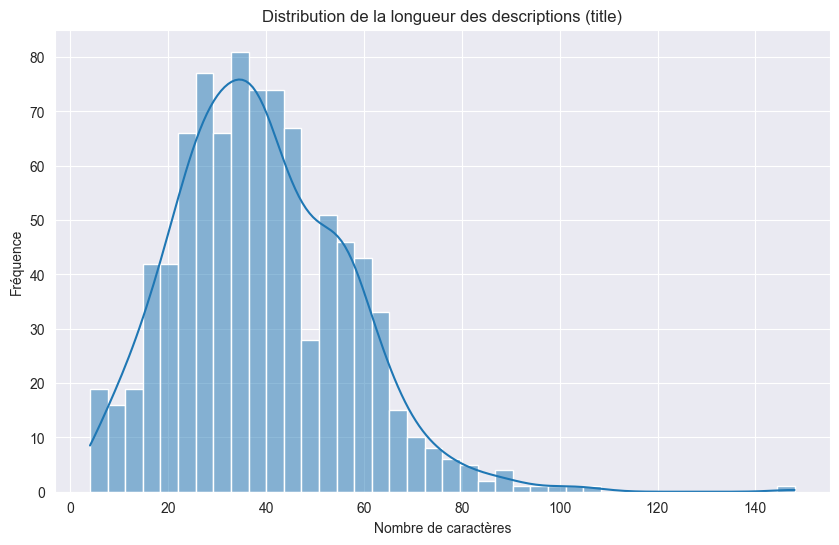

count    900.000000
mean      39.032222
std       17.462436
min        4.000000
25%       27.000000
50%       37.000000
75%       51.000000
max      148.000000
Name: title_len, dtype: float64

In [28]:
df_images['title_len'] = df_images['title'].astype(str).str.len()

plt.figure(figsize=(10,6))
sns.histplot(df_images['title_len'], bins=40, kde=True)
plt.title("Distribution de la longueur des descriptions (title)")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()

df_images['title_len'].describe()


### Analyse de la longueur des descriptions (title)

La plupart des titres de produits sont relativement courts : la majorité se situe entre **20 et 40 caractères**. La distribution est asymétrique, avec une longue traîne de titres plus détaillés mais beaucoup plus rares.

Cela suggère que les descriptions textuelles ne sont pas de véritables descriptions marketing complètes, mais plutôt des noms de produits.  

Ce manque d’information textuelle pourrait limiter la richesse des embeddings textuels et leur capacité à capturer les différences entre produits très similaires au sein d’une même catégorie.

## Price

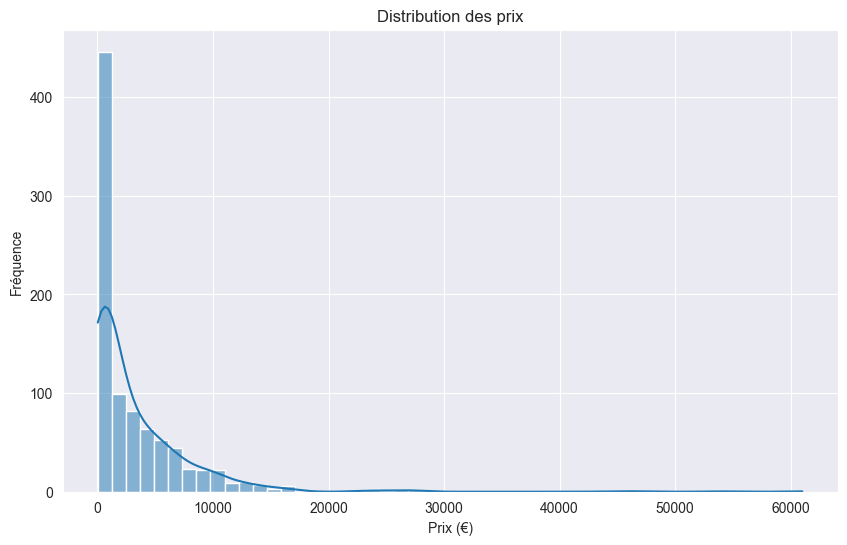

count      900.000000
mean      3239.513689
std       5151.902095
min         23.000000
25%        380.000000
50%       1275.000000
75%       4700.000000
max      61000.000000
Name: price, dtype: float64

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df_images['price'], bins=50, kde=True)
plt.title("Distribution des prix")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()

df_images['price'].describe()


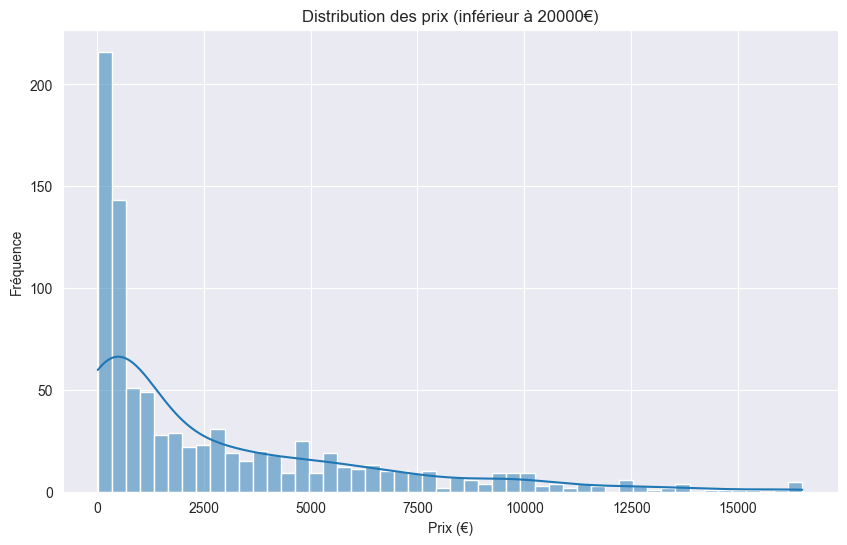

count      889.000000
mean      2846.864252
std       3475.395525
min         23.000000
25%        360.000000
50%       1240.000000
75%       4450.000000
max      16500.000000
Name: price, dtype: float64

In [30]:
df_filtered = df_images[df_images['price'] < 20000]

plt.figure(figsize=(10,6))
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.title("Distribution des prix (inférieur à 20000€)")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()

df_filtered['price'].describe()

### Analyse de la distribution des prix

La distribution des prix est fortement asymétrique : la plupart des produits se situent dans une gamme de prix relativement accessible pour une marque de luxe, tandis qu’une portion très limitée d’articles très haut de gamme génère une longue traîne de prix élevés.

La médiane se situe à **1240 €**, ce qui signifie que **la moitié des produits coûtent moins de ce montant**, tandis que la moyenne est tirée vers le haut par des prix extrêmes atteignant **16 500 €**.  

Cette hétérogénéité du prix devra être prise en compte, notamment via des transformations (log-scale) pour éviter que les outliers ne perturbent les modèles.


## Préparation des données

#### Redimensionnement des images

In [31]:
from PIL import Image
import shutil

input_dir = "Images"
output_dir = "Images_resized"

# Supprime et recrée le dossier output
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

img_dim = (256, 256) # Taille à définir

print("Starting resizing")

for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = Image.open(img_path)
    img_resized = img.resize(img_dim)

    out_path = os.path.join(output_dir, filename)
    img_resized.save(out_path)

print("Resizing done !")

Starting resizing
Resizing done !


#### Augmentation des données

In [32]:
import tensorflow as tf

# Création du pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(factor=0.2),
])

In [33]:
input_dir = "Images_resized"
output_dir = "Images_aug"

# Supprime et recrée le dossier output
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

df_aug = pd.DataFrame(columns=df_images.columns) # nouveau dataframe

n_aug = 4 # Nombre d'images à créer
import imghdr
image_idx = "image"

for idx, row in tqdm(df_images.iterrows()):
    filename = row[image_idx]             # ex: "img_001.jpg"
    img_path = os.path.join(input_dir, filename)
    name, ext = os.path.splitext(filename)
    img = Image.open(img_path)            # ouvre la bonne image

    img_array = tf.keras.utils.img_to_array(img)
    img_batch = tf.expand_dims(img_array, 0)

    out_name = f"{name}_0{ext}"
    out_path = os.path.join(output_dir, out_name)
    img.save(out_path)

    new_row = row.copy()
    new_row[image_idx] = out_name
    df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)

    for i in range(1, n_aug + 1):
        out_img_name = f"{name}_{i}{ext}"
        aug_img = data_augmentation(img_batch)[0].numpy()
        out_path = os.path.join(output_dir, out_img_name)
        tf.keras.utils.save_img(out_path, aug_img) # sauvegarde dans le dossier

        # Ajoute une ligne dans le nouveau dataframe
        new_row = row.copy()
        new_row[image_idx] = out_img_name
        df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)

/var/folders/y2/bxbn9j2n1nn68rb5sxx6lvhr0000gn/T/ipykernel_9409/2018091354.py:12: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr
0it [00:00, ?it/s]/var/folders/y2/bxbn9j2n1nn68rb5sxx6lvhr0000gn/T/ipykernel_9409/2018091354.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)
900it [00:34, 26.17it/s]


## Visualisation des exemples des produits pour chaque catégorie majeure

['FASHION' 'EYEWEAR' 'JEWELRY' 'MAKEUP' 'FRAGRANCE' 'WATCHES' 'SKINCARE']
PP75950V67729_0.jpg
PABB243B13560_4.jpg


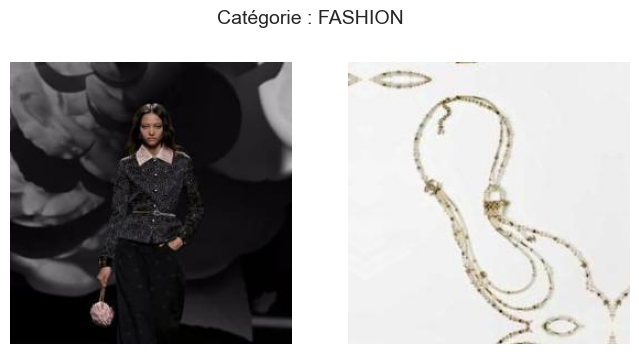

PA75273_1.jpg
PA75263_0.jpg


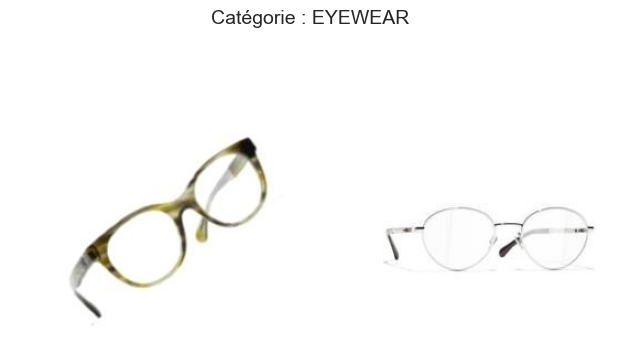

PJ11864_3.jpg
PJ11662_4.jpg


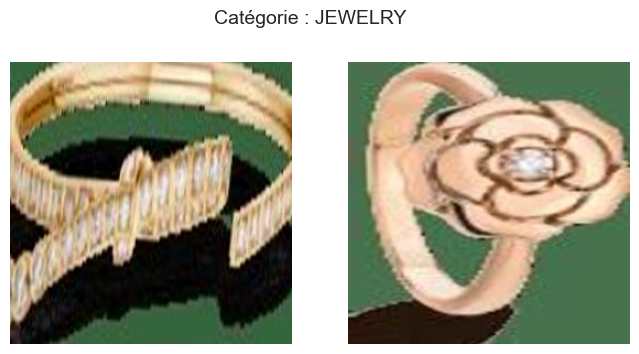

PP132210_0.jpg
PP151955_0.jpg


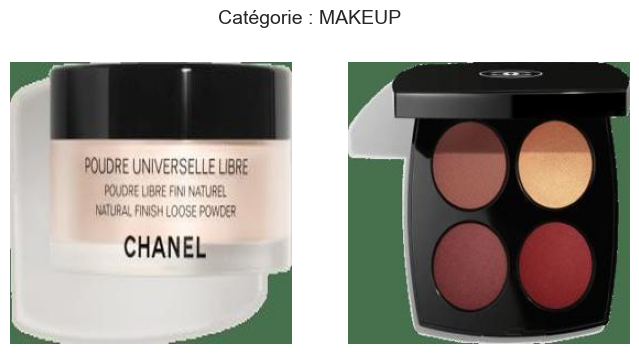

PP113940_3.jpg
PP102900_4.jpg


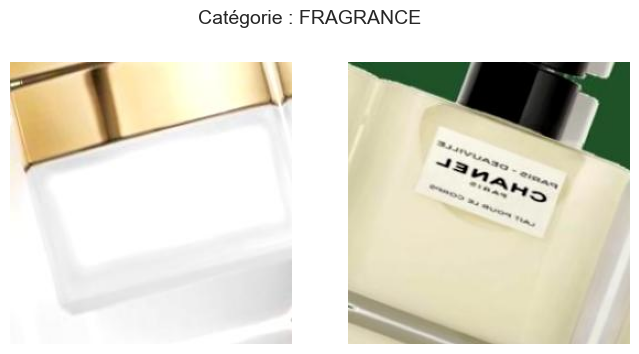

PPH6185_4.jpg
PPH6208_2.jpg


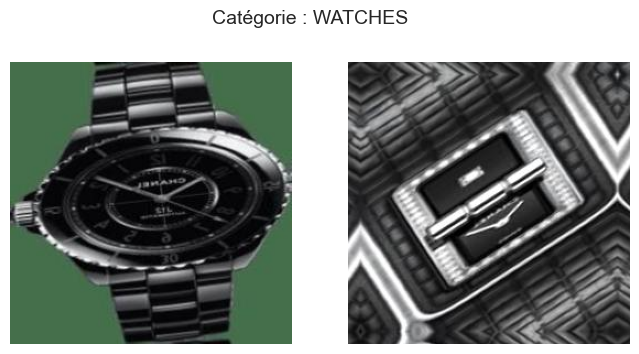

PP140190_4.jpg
PP144330_4.jpg


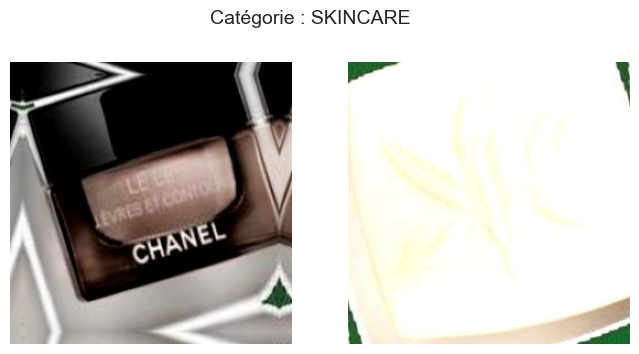

In [34]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Liste des catégories uniques
categories = df_aug['category1_code'].unique()
print(categories)

# Parcours des catégories
for cat in categories:
    subset = df_aug[df_aug['category1_code'] == cat]

    # Prendre 2 images aléatoires
    sample_images = subset.sample(min(2, len(subset)))

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f"Catégorie : {cat}", fontsize=14)

    for ax, (_, row) in zip(axes, sample_images.iterrows()):
        img = Image.open(f"Images_aug/{row['image']}")
        print(row['image'])
        ax.imshow(img)
        ax.axis('off')

    plt.show()


## Partie 2

### CNN

In [35]:
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import numpy as np

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dense(44, activation='sigmoid'))

model.summary()

/Users/Florian/Documents/test/venv/ProjetFinal/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4, 4, 44)       │         2,860 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,180 (231.17 KB)

 Trainable params: 59,180 (231.17 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
counts = df_aug["category2_code"].value_counts()
IMG_SIZE = (256, 256)

X = []
y = []

for idx, row in tqdm(df_aug.iterrows()):
    img_path = os.path.join(output_dir, row["image"])
    img = Image.open(img_path).convert("RGB").resize(IMG_SIZE)
    X.append(np.array(img))
    y.append(row["category2_code"])


4500it [00:01, 3131.24it/s]


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X = np.array(X, dtype="float32") / 255.0
y = np.array(y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Partie 3 : Analyse et comparaison des embeddings textuels

### 1. Traduction des descriptions

Ici les titres sont en anglais, on va utiliser google tanslate pour les traduire et rajouter une colonne à notre dataset

In [40]:
df_images['title'].value_counts()

title
Schwarz. Gläser: Grau  Mit Verlauf                                        17
Schwarz                                                                   13
Schwarz. Gläser: Transparent                                              11
18 Karat Weißgold  Diamanten                                              10
Schwarz. Gläser: Grau                                                      9
                                                                          ..
Glänzendes Kalbsleder in Vintage-Optik & goldfarbenes Metall  Hellrosa     1
SCHÄUMENDES DUSCHGEL                                                       1
Schwarz & goldfarben. Gläser: Grau  Mit Verlauf                            1
Goldfarben. Gläser: Braun  Mit Verlauf                                     1
POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT                           1
Name: count, Length: 596, dtype: int64

In [41]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

if os.path.exists('data_aug.csv') :
    df_aug = pd.read_csv('data_aug.csv')

else:
    
    translator = GoogleTranslator(source='auto', target='en')
    
    tqdm.pandas()
    
    # Étape 1 : trouver les titres uniques
    unique_titles = df_aug['title'].unique()
    
    # Étape 2 : traduire chaque titre unique
    translated_dict = {}
    for t in tqdm(unique_titles, desc="Traduction des titres uniques"):
        try:
            translated_dict[t] = translator.translate(t)
        except Exception as e:
            print(f"Erreur :{e}")
            translated_dict[t] = t
    
    # Étape 3 : mapper la traduction sur toutes les lignes
    df_aug['title_translated'] = df_aug['title'].map(translated_dict)
    
    # on sauvergarde
    df_aug.to_csv("data_aug.csv", index=False)

df_aug


,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,title_len,title_translated
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_0.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
1,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_1.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
2,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_2.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
3,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_3.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
4,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_4.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
...,...,...,...,...,...,...,...,...,...,...
4495,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/small-bowling-bag-white-shearling-lambskin-silver-tone-metal-shearling-lambskin-silver-tone-metal-packshot-artistique-vue4-as4280b1369310601-9529173606430.jpg",5400.0,PAS4280B13693_0.jpg,38,Lambskin & Silver Metal White
4496,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/small-bowling-bag-white-shearling-lambskin-silver-tone-metal-shearling-lambskin-silver-tone-metal-packshot-artistique

### 2. Génération des embeddings textuels

In [42]:
## !pip install tf-keras
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

descriptions = df_aug["title_translated"].tolist()

embeddings = model.encode(descriptions, show_progress_bar=True)

# On ajoute les embeddings au dataframe sous forme de liste
df_aug["embeddings"] = embeddings.tolist()

df_aug.to_csv("data_emb.csv", index=False)

Batches: 100%|██████████| 141/141 [00:02<00:00, 57.42it/s]


Ils ont tous une taille de 384

In [43]:
l = df_aug.embeddings.tolist()[0]
count = 0
for val in l:
    count += 1
print(count)

384


On visualise notre embedding

In [44]:
df_aug['embeddings']

0                       [-0.0358271561563015, -0.02413574978709221, -0.0036777581553906202, 0.050970565527677536, 0.013176136650145054, 0.009758958593010902, 0.10111204534769058, -0.03330297768115997, -0.02398608811199665, -0.06847968697547913, -0.06338656693696976, -0.015602012164890766, -0.011272033676505089, -0.05773278698325157, -0.03839379921555519, 0.05429547280073166, 0.06456887722015381, -0.11090632528066635, 0.017204368487000465, 0.0746695026755333, 0.009585629217326641, -0.05727608501911163, 0.009868139401078224, 0.029251541942358017, -0.09991495311260223, 0.026227999478578568, 0.011305702850222588, 0.021336082369089127, -0.019577549770474434, -0.08590726554393768, 0.043609533458948135, 0.06653985381126404, 0.034065041691064835, -0.044373150914907455, -0.08164005726575851, -0.05347314849495888, 0.04060132056474686, 0.06801251322031021, -0.06008023023605347, 0.0044333357363939285, -0.06929397583007812, 0.05641523376107216, -0.04560801014304161, -0.050515949726104736, 0.0141879

Pour comparer nos embeddings on va comparer deux objets d'une meme categorie1 et deux objets d'une categorie2 similaire et differentes. Pour cela on fait deux fonctions

In [45]:
from scipy.spatial.distance import cosine, euclidean
import random

def compare_embeddings_cat2(categorie1, categorie2, df):
    
    if categorie1 == categorie2:
        df_select1 = df[df['category2_code'] == categorie1]
        df_select2 = df_select1
    else:
        df_select1 = df[df['category2_code'] == categorie1]
        df_select2 = df[df['category2_code'] == categorie2]
    
    i = random.choice(df_select1.index)
    j = random.choice(df_select2.index)
    
    object1 = df_select1.loc[i, 'title_translated']
    object2 = df_select2.loc[j, 'title_translated']
    emb1 = df_select1.loc[i, 'embeddings']
    emb2 = df_select2.loc[j, 'embeddings']
    
    cos_sim = 1 - cosine(emb1, emb2)  # Similarité cosinus
    euc_dist = euclidean(emb1, emb2)  # Distance euclidienne
    
    print(f"Comparaison entre des objets des categories {categorie1} et {categorie2}:")
    print(f"  Description 1: {object1}")
    print(f"  Description 2: {object2}")
    print(f"  Cosine similarity: {cos_sim:.4f}")
    print(f"  Euclidean distance: {euc_dist:.4f}\n")


On a donc pour deux paires de lunettes une bonne similaritée. Cependant les embeddings sont sur les titres et non les catégories.

In [46]:
compare_embeddings_cat2("SUNGLASSES", "SUNGLASSES", df_aug)

Comparaison entre des objets des categories SUNGLASSES et SUNGLASSES:
  Description 1: Black. Lenses: Gray with gradient
  Description 2: Dark beige. Lenses: Light brown with gradient
  Cosine similarity: 0.7705
  Euclidean distance: 0.6775



On réalise une deuxieme fonction afin de comparer des embeddings pour des objets d'une meme ou differente categrie1.

In [47]:
def compare_embeddings_cat1(categorie1, categorie2, df):
    
    if categorie1 == categorie2:
        df_select1 = df[df['category1_code'] == categorie1]
        df_select2 = df_select1
    else:
        df_select1 = df[df['category1_code'] == categorie1]
        df_select2 = df[df['category1_code'] == categorie2]
    
    i = random.choice(df_select1.index)
    j = random.choice(df_select2.index)
    
    object1 = df_select1.loc[i, 'title_translated']
    object2 = df_select2.loc[j, 'title_translated']
    emb1 = df_select1.loc[i, 'embeddings']
    emb2 = df_select2.loc[j, 'embeddings']
    
    cos_sim = 1 - cosine(emb1, emb2)  # Similarité cosinus
    euc_dist = euclidean(emb1, emb2)  # Distance euclidienne
    
    print(f"Comparaison entre des objets des categories {categorie1} et {categorie2}:")
    print(f"  Description 1: {object1}")
    print(f"  Description 2: {object2}")
    print(f"  Cosine similarity: {cos_sim:.4f}")
    print(f"  Euclidean distance: {euc_dist:.4f}\n")


Rappel des categories

In [48]:
df_aug['category1_code'].unique()

array(['FASHION', 'EYEWEAR', 'JEWELRY', 'MAKEUP', 'FRAGRANCE', 'WATCHES',
       'SKINCARE'], dtype=object)

In [49]:
compare_embeddings_cat1("WATCHES", "EYEWEAR", df_aug)

Comparaison entre des objets des categories WATCHES et EYEWEAR:
  Description 1: Medium model stainless steel and diamonds calfskin bracelet with quilted pattern. Includes second bracelet.
  Description 2: Black. Lenses: Gray with gradient
  Cosine similarity: 0.1186
  Euclidean distance: 1.3277



On va maintenant s'interesser à la similarité des objets textuels entre deux categories de la classe categorie1

In [50]:
def compare_embeddings_cat1_mean(categorie1, categorie2, df):
    """
    Compare tous les embeddings d'une catégorie avec ceux d'une autre
    et retourne la similarité moyenne (cosine et distance euclidienne).
    """
    
    # Sélection des produits
    df1 = df[df['category1_code'] == categorie1]
    df2 = df[df['category1_code'] == categorie2]
    
    if len(df1) == 0 or len(df2) == 0:
        print("Une des catégories n'a pas de produits.")
        return
    
    cosine_sims = []
    euclidean_dists = []
    
    # Boucle sur tous les produits
    for emb1 in df1['embeddings']:
        for emb2 in df2['embeddings']:
            cosine_sims.append(1 - cosine(emb1, emb2))
            euclidean_dists.append(euclidean(emb1, emb2))
    
    # Moyennes
    mean_cosine = np.mean(cosine_sims)
    mean_euclidean = np.mean(euclidean_dists)
    
    print(f"Comparaison moyenne entre catégories {categorie1} et {categorie2}:")
    print(f"  Cosine similarity moyenne: {mean_cosine:.4f}")
    print(f"  Distance euclidienne moyenne: {mean_euclidean:.4f}\n")
    
    return mean_cosine, mean_euclidean


In [51]:
compare_embeddings_cat1_mean("EYEWEAR", "EYEWEAR", df_aug)   # intra-catégorie

Comparaison moyenne entre catégories EYEWEAR et EYEWEAR:
  Cosine similarity moyenne: 0.4668
  Distance euclidienne moyenne: 0.9728



(np.float64(0.4667563496485722), np.float64(0.9728268468507102))

In [52]:
compare_embeddings_cat1_mean("EYEWEAR", "FRAGRANCE", df_aug)  # inter-catégorie

Comparaison moyenne entre catégories EYEWEAR et FRAGRANCE:
  Cosine similarity moyenne: 0.0862
  Distance euclidienne moyenne: 1.3509



(np.float64(0.08624051560224345), np.float64(1.3508687397018928))

In [53]:
def compare_embeddings_cat2_mean(categorie1, categorie2, df):
    """
    Compare tous les embeddings d'une catégorie avec ceux d'une autre
    et retourne la similarité moyenne (cosine et distance euclidienne).
    """
    
    # Sélection des produits
    df1 = df[df['category2_code'] == categorie1]
    df2 = df[df['category2_code'] == categorie2]
    
    if len(df1) == 0 or len(df2) == 0:
        print("Une des catégories n'a pas de produits.")
        return
    
    cosine_sims = []
    euclidean_dists = []
    
    # Boucle sur tous les produits
    for emb1 in df1['embeddings']:
        for emb2 in df2['embeddings']:
            cosine_sims.append(1 - cosine(emb1, emb2))
            euclidean_dists.append(euclidean(emb1, emb2))
    
    # Moyennes
    mean_cosine = np.mean(cosine_sims)
    mean_euclidean = np.mean(euclidean_dists)
    
    print(f"Comparaison moyenne entre catégories {categorie1} et {categorie2}:")
    print(f"  Cosine similarity moyenne: {mean_cosine:.4f}")
    print(f"  Distance euclidienne moyenne: {mean_euclidean:.4f}\n")
    
    return mean_cosine, mean_euclidean


In [54]:
compare_embeddings_cat2_mean("SUNGLASSES", "SUNGLASSES", df_aug)  # intra-catégorie

Comparaison moyenne entre catégories SUNGLASSES et SUNGLASSES:
  Cosine similarity moyenne: 0.7056
  Distance euclidienne moyenne: 0.7214



(np.float64(0.7055742901899256), np.float64(0.721425744188817))

In [55]:
compare_embeddings_cat2_mean("SUNGLASSES", "WATCHES", df_aug)  # inter-catégorie

Comparaison moyenne entre catégories SUNGLASSES et WATCHES:
  Cosine similarity moyenne: 0.1792
  Distance euclidienne moyenne: 1.2804



(np.float64(0.17917535489834693), np.float64(1.2803793277285644))

In [56]:
articles = pd.read_csv('data_emb.csv')

In [57]:
articles

category1_code category2_code   product_code  \
0           FASHION       HANDBAGS  PAS4152B13455   
1           FASHION       HANDBAGS  PAS4152B13455   
2           FASHION       HANDBAGS  PAS4152B13455   
3           FASHION       HANDBAGS  PAS4152B13455   
4           FASHION       HANDBAGS  PAS4152B13455   
...             ...            ...            ...   
4495        FASHION       HANDBAGS  PAS4280B13693   
4496        FASHION       HANDBAGS  PAS4280B13693   
4497        FASHION       HANDBAGS  PAS4280B13693   
4498        FASHION       HANDBAGS  PAS4280B13693   
4499        FASHION       HANDBAGS  PAS4280B13693   

                                                      title  \
0     Tweed & goldfarbenes Metall  Schwarz  Rosa & Bordeaux   
1     Tweed & goldfarbenes Metall  Schwarz  Rosa & Bordeaux   
2     Tweed & goldfarbenes Metall  Schwarz  Rosa & Bordeaux   
3     Tweed & goldfarbenes Metall  Schwarz  Rosa & Bordeaux   
4     Tweed & goldfarbenes Metall  Schwarz  Rosa & Bordeaux   
...                                                     ...   
4495                 Lammfell & silberfarbenes Metall  Weiß   
4496                 Lammfell & silberfarbenes Metall  Weiß   
4497                 Lammfell & silberfarbenes Metall  Weiß   
4498                 Lammfell & silberfarbenes Metall  Weiß   
4499                 Lammfell & silberfarbenes Metall  Weiß   

                                                                                                      itemurl  \
0           https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/   
1           https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/   
2           https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/   
3           https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/   
4           https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/   
...                                                                                                       ...   
4495  https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/   
4496  https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/   
4497  https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/   
4498  https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/   
4499  https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/   

                                                                                                                                                                                                                                                                                                                                 imageurl  \
0                         https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg   
1                         https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg   
2                         https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-go

In [58]:
from scipy.spatial.distance import cosine

def encode_text(text: str):
    model = SentenceTransformer("all-MiniLM-L6-v2")
    embeddings = model.encode(text, show_progress_bar=True)
    return embeddings


def compute_similarity(query_emb, articles):
    df = articles.copy()

    df["similarity"] = df["embeddings"].apply(
        lambda emb: 1 - cosine(query_emb, emb)
    )

    return df.sort_values("similarity", ascending=False)


In [59]:
emb = encode_text("Paris")
print(emb)
res = compute_similarity(emb, df_aug)

Batches: 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]

[ 8.80357102e-02  2.03873031e-02  2.58994140e-02 -3.47748101e-02
  9.48169455e-03 -2.02793628e-02  1.54374633e-02 -2.25567445e-02
  3.43290083e-02  2.06934959e-02 -5.79499081e-03 -7.86599517e-02
 -1.22040967e-02 -5.16201407e-02 -4.53019217e-02 -8.57303888e-02
  1.89046916e-02 -5.91342747e-02  1.39685441e-02 -4.29415889e-02
 -6.15868112e-03 -1.22459307e-02  5.63748702e-02  6.06142469e-02
 -2.46791132e-02  2.15542298e-02 -6.09951541e-02 -9.87050310e-03
  7.65050435e-03 -5.00527620e-02  3.07695679e-02  6.14744984e-03
 -6.11407794e-02  3.24064605e-02  7.94351846e-03 -6.85587805e-03
  9.43505950e-03 -3.38627584e-02 -2.95576220e-03  4.31674719e-02
 -3.78322526e-04 -6.66226521e-02 -5.95482960e-02 -5.42132780e-02
 -3.89130116e-02 -1.30902352e-02  5.40549010e-02  7.27332309e-02
  3.13005820e-02 -4.44151945e-02  1.03308022e-01  5.12075648e-02
 -5.96722625e-02 -4.46313173e-02 -4.14542854e-02  5.81189953e-02
  4.20751795e-02  5.27708195e-02  2.65738294e-02  8.63829926e-02
  2.47569811e-02 -2.02210

In [60]:
res['product_code']

3343    PP75172V66319
3344    PP75172V66319
3340    PP75172V66319
3341    PP75172V66319
3342    PP75172V66319
            ...      
318     PAS4397B14558
317     PAS4397B14558
316     PAS4397B14558
315     PAS4397B14558
319     PAS4397B14558
Name: product_code, Length: 4500, dtype: object

In [95]:
import tensorflow as tf

def load_cnn_model():
    # Entrée d'image
    inputs = tf.keras.Input(shape=(256, 256, 3))

    # Couche TFSMLayer : modèle en argument positionnel, endpoint en nommé
    features = tf.keras.layers.TFSMLayer(
        "cnn_feature_extractor_model",  # chemin vers le modèle exporté
        call_endpoint="serve"           # endpoint défini lors de l'export
    )(inputs)

    # Création du modèle
    model = tf.keras.Model(inputs, features)

    return model


In [96]:
def compute_similarity(query_emb, df, top_k=10):
    query_emb = np.array(query_emb).flatten()
    df = df.copy()

    # Calcul de la similarité
    df['similarity'] = df['embeddings'].apply(lambda emb: 1 - cosine(query_emb, np.array(emb).flatten()))

    # Trier par similarité décroissante
    df_sorted = df.sort_values("similarity", ascending=False)

    # Garder seulement le premier article unique par product_code
    df_unique = df_sorted.drop_duplicates(subset='product_code', keep='first')

    # Sélectionner les top_k
    df_topk = df_unique.head(top_k)

    sims = df_topk['similarity'].values
    order = df_topk.index.tolist()
    return sims, order

In [97]:
def encode_image(image: Image.Image):
    model = load_cnn_model()
    print("fin du load_model")

    img = image.convert("RGB").resize((256, 256))
    img_array = np.array(img) / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    embeddings = model.predict(img_array, verbose=2)
    print("fin du model")

    return embeddings.flatten()

In [98]:
from PIL import Image

image = Image.open("Images_resized/PA40888.jpg")
print(type(image))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
emb_img = encode_image(image)
print(emb_img)

fin du load_model
